In [255]:
import torch
import torch.nn as nn
from tqdm import trange
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [256]:
dataset = pd.read_csv("./datasets/Salary_Data.csv")
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset.head(), dataset.shape

(   YearsExperience    Salary
 0              7.9  101302.0
 1              4.0   55794.0
 2              3.7   57189.0
 3              3.2   64445.0
 4              9.6  112635.0,
 (30, 2))

In [257]:
dataset = dataset.to_numpy()
X, y = dataset[:,0], dataset[:,1]
X, y

(array([ 7.9,  4. ,  3.7,  3.2,  9.6,  7.1,  6.8,  1.5,  3.2,  4.1,  9. ,
         5.1, 10.3,  9.5,  4.9,  8.2,  4.5,  1.3,  4. ,  5.9,  6. ,  5.3,
         2.9,  8.7,  1.1, 10.5,  2. ,  2.2,  3.9,  3. ]),
 array([101302.,  55794.,  57189.,  64445., 112635.,  98273.,  91738.,
         37731.,  54445.,  57081., 105582.,  66029., 122391., 116969.,
         67938., 113812.,  61111.,  46205.,  56957.,  81363.,  93940.,
         83088.,  56642., 109431.,  39343., 121872.,  43525.,  39891.,
         63218.,  60150.]))

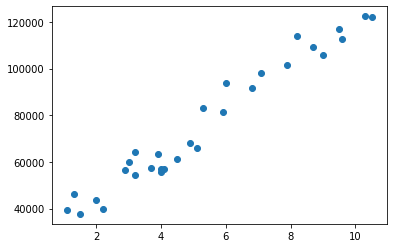

In [258]:
plt.scatter(X,y)

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

(20,) (10,) (20,) (10,)
(20, 1) (10, 1) (20, 1) (10, 1)


In [260]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

In [261]:
learning_rate = 0.01
n_iters = 5000

input_size, output_size = 1, 1

model = nn.Linear(input_size, output_size)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

loss: 31924298.00000:  57%|█████████████████████████████████                         | 2852/5000 [00:02<00:01, 1297.93it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

loss: 31924298.00000: 100%|██████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1358.95it/s]


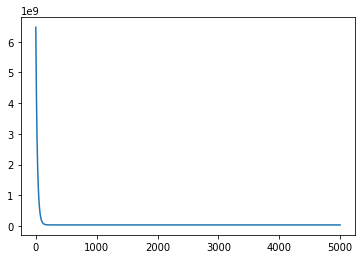

In [262]:
losses = []
for epoch in (t := trange(n_iters)):
    
    y_predicted = model(X_train)
    
    loss = criterion(y_predicted, y_train)
    
    
    loss.backward()
    
    
    optimizer.step()
    
    optimizer.zero_grad()
    
    
    losses.append(loss.item())
    
    t.set_description("loss: %.5f" % loss.item())
    
plt.plot(losses)

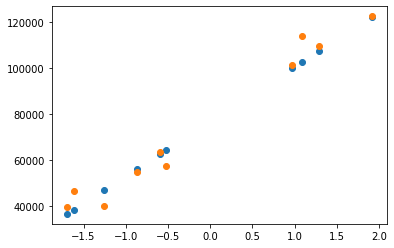

In [263]:
predicted = model(X_test).detach().numpy()
plt.scatter(X_test, predicted)
plt.scatter(X_test, y_test)